<a href="https://colab.research.google.com/github/sanmevv/Turkey-Earthquake-NLP-ML/blob/main/Preprocessing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from collections import Counter
import re

from sklearn.model_selection import train_test_split

from pycaret.classification import *

from imblearn.over_sampling import SMOTE

In [3]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/tweetss.csv')

In [4]:
data.head()

,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url
0,951570870,StellaMillburn,1637372875018510080.0,3/19/23 12:00 AM,8:38:08,"Next diplomatic victory on the horizon, Syria ...",en,NaN,"Socialist, grandmother to eight. #FreeJulianAs...","<a href=""http://twitter.com/download/iphone"" r...",0,0.0,0.0,[],758.0,183.0,3894.0,38:13.9,https://twitter.com/StellaMillburn/status/1637...
1,1023610564390480000,wacklena,1637372817145720064.0,3/19/23 12:00 AM,8:37:55,carpets that are made in turkey r so nice,en,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0.0,0.0,[],277.0,86.0,21340.0,38:13.9,https://twitter.com/wacklena/status/1637372817...
2,1210532746046720000,resitcaliskan,1637372740859460096.0,3/19/23 12:00 AM,8:37:36,@O2 Hello Is there a pay-as-you-go Internet an...,en,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",0,0.0,0.0,[],104.0,5.0,123.0,38:13.9,https://twitter.com/resitcaliskan/status/16373...
3,1596201806488550000,ChrisCo53645942,1637372733808930048.0,3/19/23 12:00 AM,8:37:35,Spaghetti with turkey is available https://t.c...,en,"Lagos, Nigeria",COMEDIAN/CHEF,"<a href=""http://twitter.com/download/android"" ...",0,0.0,0.0,[],780.0,2215.0,30.0,38:13.9,https://twitter.com/ChrisCo53645942/status/163...
4,1529850416783140000,UA_22_Ukraine,1637372706667500032.0,3/19/23 12:00 AM,8:37:28,(Bloomberg) 🇸🇪#Sweden will continue efforts t...,en,NaN,"Support aux ukraniens, diverses nouvelles! 🇺🇦 ...","<a href=""http://twitter.com/download/android"" ...",0,0.0,0.0,"['#Sweden', '#Turkey', '#NATO', '#Erdogan', '#...",710.0,521.0,16989.0,38:13.9,https://twitter.com/UA_22_Ukraine/status/16373...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300021 entries, 0 to 300020
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   User_id       300015 non-null  object 
 1   Username      300015 non-null  object 
 2   Tweet_id      300009 non-null  object 
 3   Date          300013 non-null  object 
 4   Time          300015 non-null  object 
 5   Tweet         300015 non-null  object 
 6   Language      300007 non-null  object 
 7   Location      191943 non-null  object 
 8   Acctdesc      255679 non-null  object 
 9   Source        300001 non-null  object 
 10  Replies       300001 non-null  object 
 11  Retweets      299998 non-null  object 
 12  Likes         299995 non-null  object 
 13  Hashtags      299995 non-null  object 
 14  Following     299987 non-null  float64
 15  Followers     299987 non-null  float64
 16  Total_tweets  299987 non-null  float64
 17  Extracted     299987 non-null  object 
 18  Url 

In [6]:
data.isna().any()

User_id         True
Username        True
Tweet_id        True
Date            True
Time            True
Tweet           True
Language        True
Location        True
Acctdesc        True
Source          True
Replies         True
Retweets        True
Likes           True
Hashtags        True
Following       True
Followers       True
Total_tweets    True
Extracted       True
Url             True
dtype: bool

In [7]:
import re
import string

In [13]:
#Preprocessing Function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

In [16]:
import re

def preprocess_text(text):
    if isinstance(text, str):
        # apply regular expressions and other string operations
        text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
        text = re.sub(r'\d+', '', text)  # remove digits
        text = text.lower()  # convert to lowercase
        text = text.strip()  # remove leading/trailing whitespaces
        return text
    else:
        # handle cases where input is not a string (e.g., missing values)
        return ''


In [17]:
if data['Tweet'].dtype != 'object':
    data['Tweet'] = data['Tweet'].astype(str)


In [18]:
data['Tweet'] = data['Tweet'].apply(preprocess_text)

Commonly Used Words

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [21]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(data['Tweet'].values)

In [22]:
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [23]:
# Split the text into individual words
words = all_text.split()

Remove stop words

In [25]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
# Count the frequency of each word
word_counts = Counter(words)

In [27]:
top_words = word_counts.most_common(100)
top_words

[('turkey', 282955),
 ('earthquake', 41187),
 ('syria', 24790),
 ('amp', 18972),
 ('like', 18614),
 ('people', 17056),
 ('turkeys', 13237),
 ('us', 12604),
 ('one', 12187),
 ('nato', 12153),
 ('russia', 11694),
 ('earthquakes', 10914),
 ('dont', 10579),
 ('help', 9448),
 ('im', 9153),
 ('turkish', 9087),
 ('get', 8976),
 ('would', 8657),
 ('time', 8541),
 ('go', 8008),
 ('country', 7777),
 ('ukraine', 7636),
 ('also', 7531),
 ('good', 7315),
 ('support', 7119),
 ('india', 7103),
 ('erdogan', 6925),
 ('cold', 6874),
 ('world', 6736),
 ('know', 6719),
 ('countries', 6707),
 ('even', 6679),
 ('new', 6513),
 ('ago', 6511),
 ('need', 6366),
 ('want', 6239),
 ('km', 6220),
 ('via', 6163),
 ('think', 6104),
 ('still', 6049),
 ('day', 6048),
 ('see', 5940),
 ('make', 5801),
 ('deprem', 5790),
 ('istanbul', 5691),
 ('back', 5672),
 ('china', 5500),
 ('iran', 5462),
 ('victims', 5421),
 ('many', 5316),
 ('years', 5277),
 ('news', 5104),
 ('going', 5101),
 ('war', 5022),
 ('pakistan', 5005),
 ('m

Create a bar chart of the most common words

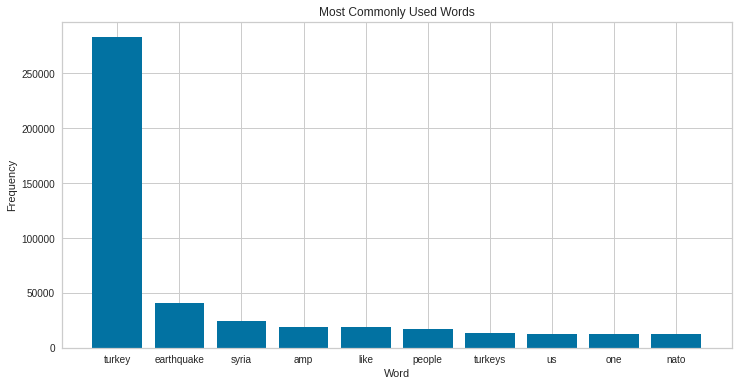

In [31]:

top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

Creating Classes for Tweets:

"Help": Tweets that express a need for assistance or ask for help, such as:

"We need supplies and shelter for the earthquake victims"

"Please help those affected by the earthquake by donating to relief efforts"

"News": Tweets that share information about the earthquake or its aftermath, such as:

"Magnitude 6.8 earthquake strikes Turkey and Syria"

"Rescue teams continue to search for survivors in the rubble"

"Funding": Tweets that promote or discuss fundraising efforts for earthquake relief, such as:

"Join our fundraising campaign to help those affected by the earthquake"

"Which charities are accepting donations for the earthquake relief efforts?"

"Survivor stories": Tweets that share personal accounts or experiences of the earthquake, such as:

"I was in the middle of a meeting when the earthquake hit. It was the scariest moment of my life"

"My family and I are safe, but our house was severely damaged in the earthquake"

"Volunteering": Tweets that promote or discuss volunteer efforts for earthquake relief, such as:

"We need volunteers to help with search and rescue operations in the affected areas"

"If you want to help, consider volunteering at a local shelter or distribution center"

"Political response": Tweets that discuss the government or political response to the earthquake, such as:

"The government needs to do more to support the earthquake victims and rebuild the affected areas"

"I'm disappointed in the lack of action from our elected officials regarding the earthquake relief efforts"

"Humanitarian aid": Tweets that discuss or promote humanitarian aid efforts for the earthquake, such as:

"The Red Cross is on the ground providing emergency relief to those affected by the earthquake"

"International aid organizations are stepping up to help with the earthquake recovery efforts"

Safety information: Tweets that provide information about how to stay safe during or after the earthquake, such as:

"Remember to drop, cover, and hold on during an earthquake to protect yourself from falling objects"

"Be careful of aftershocks and potential hazards like gas leaks and downed power lines"

Infrastructure damage: Tweets that describe the damage to buildings, roads, and other infrastructure caused by the earthquake, such as:

"The earthquake caused a major bridge to collapse, cutting off access to the affected area"

"Many buildings in the city center were severely damaged or destroyed by the earthquake"

Psychological impact: Tweets that discuss the emotional toll of the earthquake on survivors and first responders, such as:

"Trauma from the earthquake can have long-lasting effects on mental health. Make sure to seek support if you need it"

"The stress and exhaustion of working in earthquake relief can take a toll on first responders. Let's show them our support"

Animal rescue: Tweets that promote or discuss efforts to rescue and care for animals affected by the earthquake, such as:

"Many pets and farm animals have been separated from their owners or injured in the earthquake. Let's support animal rescue organizations"

"If you're looking for ways to help earthquake victims, consider donating to organizations that are rescuing and caring for animals"

In [33]:

# Define the classes and their corresponding keywords
classes = {
    'Help': ['help', 'assistance', 'support', 'donate'],
    'News': ['earthquake', 'magnitude', 'aftershock', 'rescue', 'recovery'],
    'Funding': ['fundraiser', 'donation', 'charity', 'fund'],
    'Survivor stories': ['survivor', 'personal account', 'experience', 'impact'],
    'Volunteering': ['volunteer', 'helping', 'aid', 'support'],
    'Political response': ['government', 'political', 'action', 'response'],
    'Humanitarian aid': ['humanitarian', 'aid', 'relief', 'support'],
    'Casualty reports': ['injury', 'death', 'fatal', 'missing', 'victims'],
    'Infrastructure damage': ['building', 'bridge', 'road', 'power', 'water', 'gas', 'telecommunications'],
    'Weather conditions': ['storm', 'rain', 'snow', 'wind', 'temperature', 'weather'],
    'Emergency services': ['ambulance', 'fire', 'police', 'emergency', 'rescue'],
    'Social media activity': ['tweet', 'post', 'share', 'social media'],
    'Prayer and condolences': ['prayer', 'thoughts', 'condolences', 'sympathy'],
    'Technical information': ['data', 'statistics', 'analysis', 'technical'],
    'International aid': ['international', 'donor', 'aid', 'relief'],
    'Business impact': ['business', 'economic', 'financial', 'impact'],
    'Personal safety': ['safety', 'evacuation', 'shelter', 'protection', 'precaution'],
    'Safety information': ['drop', 'cover', 'hold on', 'aftershocks', 'gas leaks', 'power lines'],
    'Psychological impact': ['mental health', 'trauma', 'stress', 'exhaustion', 'first responders'],
    'Animal rescue': ['animal rescue', 'pets', 'farm animals']
}

# Define a function to label each tweet based on its content
def classify_tweet(tweet_text):
    for class_name, keywords in classes.items():
        for keyword in keywords:
            if keyword in tweet_text:
                return class_name
    return 'Other'  # If no keyword matches, label as "Other"

# Add a new column to the dataframe with the class label for each tweet
data['Class'] = data['Tweet'].apply(classify_tweet)

# Save the labeled dataset to a new CSV file
data.to_csv('/content/drive/MyDrive/tweet_data_labeled.csv', index=False)


In [34]:
df = pd.read_csv('/content/drive/MyDrive/tweet_data_labeled.csv')

In [35]:
df

,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Class
0,951570870,StellaMillburn,1.63737287501851e+18,3/19/23 12:00 AM,8:38:08,next diplomatic victory on the horizon syria a...,en,NaN,"Socialist, grandmother to eight. #FreeJulianAs...","<a href=""http://twitter.com/download/iphone"" r...",0,0.0,0.0,[],758.0,183.0,3894.0,38:13.9,https://twitter.com/StellaMillburn/status/1637...,Other
1,1023610564390480000,wacklena,1.63737281714572e+18,3/19/23 12:00 AM,8:37:55,carpets that are made in turkey r so nice,en,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0.0,0.0,[],277.0,86.0,21340.0,38:13.9,https://twitter.com/wacklena/status/1637372817...,Animal rescue
2,1210532746046720000,resitcaliskan,1.63737274085946e+18,3/19/23 12:00 AM,8:37:36,o hello is there a payasyougo internet and cal...,en,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",0,0.0,0.0,[],104.0,5.0,123.0,38:13.9,https://twitter.com/resitcaliskan/status/16373...,Help
3,1596201806488550000,ChrisCo53645942,1.63737273380893e+18,3/19/23 12:00 AM,8:37:35,spaghetti with turkey is available httpstcoupr...,en,"Lagos, Nigeria",COMEDIAN/CHEF,"<a href=""http://twitter.com/download/android"" ...",0,0.0,0.0,[],780.0,2215.0,30.0,38:13.9,https://twitter.com/ChrisCo53645942/status/163...,Other
4,1529850416783140000,UA_22_Ukraine,1.6373727066675e+18,3/19/23 12:00 AM,8:37:28,bloomberg sweden will continue efforts to per...,en,NaN,"Support aux ukraniens, diverses nouvelles! 🇺🇦 ...","<a href=""http://twitter.com/download/android"" ...",0,0.0,0.0,"['#Sweden', '#Turkey', '#NATO', '#Erdogan', '#...",710.0,521.0,16989.0,38:13.9,https://twitter.com/UA_22_Ukraine/status/16373...,Weather conditions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314830,1620638368940820000,iwannabear0ck,1.62845845243023e+18,2/22/23 12:00 AM,18:15:25,ilovebananaslut i have turkey jerky in my cabi...,en,16 |5’3| bmi 12.3| ugw: 65lbs,i love pink,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0,[],1588.0,1588.0,11779.0,44:53.6,https://twitter.com/iwannabear0ck/status/16284...,Other
314831,207575214,hananelatr,1.62845843517495e+18,2/22/23 12:00 AM,18:15:20,thebrentpeters canarymission markruffalo yes t...,en,"Washington, DC",The only wife of @JKhashoggi upon his death. M...,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,1,[],1929.0,2140.0,30678.0,44:53.6,https://twitter.com/hananelatr/status/16284584...,Political response
314832,943677440903217000,devoutmoon,1.62845842861079e+18,2/22/23 12:00 AM,18:15:19,bansky this is wild pressure cook some turkey ...,en,"arcadia grove, pa","The sky had never seemed so sky, the world had...","<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,0,[],241.0,29.0,18885.0,44:54.4,https://twitter.com/devoutmoon/status/16284584...,Other
314833,933107033183793000,JTCryptoo,1.62845842741542e+18,2/22/23 12:00 AM,18:15:19,drew_web my go to eggs and oats with blueberri...,en,Subscribe →,Spreading Good Ideas On Personal Growth & Self...,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,1,[],809.0,2202.0,15834.0,44:54.4,https://twitter.com/JTCryptoo/status/162845842...,Other


Creating a bar plot of the class distribution

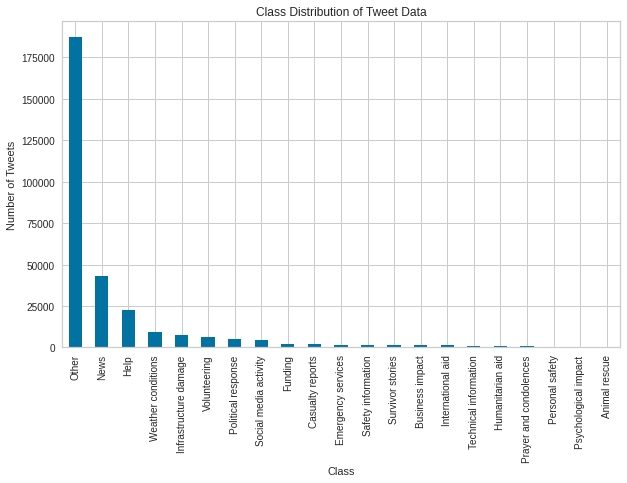

In [40]:

plt.figure(figsize=(10, 6))
class_counts = df['Class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Tweet Data')
plt.xlabel('Class')
plt.ylabel('Number of Tweets')
plt.show()


In [41]:
df.columns

Index(['User_id', 'Username', 'Tweet_id', 'Date', 'Time', 'Tweet', 'Language',
       'Location', 'Acctdesc', 'Source', 'Replies', 'Retweets', 'Likes',
       'Hashtags', 'Following', 'Followers', 'Total_tweets', 'Extracted',
       'Url', 'Class'],
      dtype='object')

In [42]:
df['Tweet'].isna().sum()

91

In [43]:
df.dropna(axis = 0, inplace = True)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Tweet'])
y = df['Class']

Simple Prediction of Classes

In [50]:

# Sample input tweet
input_tweet = "Prayers and thoughts for everyone affected by the #earthquake that just hit our city. Stay safe and seek shelter if necessary." #naturaldisaster #safetyfirst

# Classify the tweet
predicted_class = classify_tweet(input_tweet)

# Print the predicted class
print('Predicted class:', predicted_class)

Predicted class: News


In [51]:
df 

,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Class
3,1596201806488550000,ChrisCo53645942,1.63737273380893e+18,3/19/23 12:00 AM,8:37:35,spaghetti with turkey is available httpstcoupr...,en,"Lagos, Nigeria",COMEDIAN/CHEF,"<a href=""http://twitter.com/download/android"" ...",0,0.0,0.0,[],780.0,2215.0,30.0,38:13.9,https://twitter.com/ChrisCo53645942/status/163...,Other
5,1425028868780570000,NewsNetworkAll,1.6373726802393e+18,3/19/23 12:00 AM,8:37:22,iran court sentences two to death over deadly ...,en,Earth,"Latest World News, Breaking News, Updates on 🌏...","<a href=""https://contentstudio.io"" rel=""nofoll...",0,0.0,0.0,"['#BreakingNews', '#Turkey', '#islamabad', '#i...",12.0,530.0,62319.0,38:13.9,https://twitter.com/NewsNetworkAll/status/1637...,Casualty reports
10,1486696075801110000,ShoppingAlertDE,1.63737241630867e+18,3/19/23 12:00 AM,8:36:19,baby body mit kurzen ärmeln turkey is calling ...,de,🇩🇪,"Online-Shopping für Elektronik, Bekleidung und...","<a href=""https://www.005.shoppingpromoter.com""...",0,0.0,0.0,['#Amazon'],181.0,193.0,272464.0,38:13.9,https://twitter.com/ShoppingAlertDE/status/163...,Other
11,65049550,egitimreformu,1.63737236925682e+18,3/19/23 12:00 AM,8:36:08,engelli çocuk hakları ağından cansın kuvvet af...,tr,"Istanbul, Turkey",Çocuğun ve toplumun gelişimi için eğitimde dön...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0.0,0.0,[],143.0,34448.0,7955.0,38:13.9,https://twitter.com/egitimreformu/status/16373...,Other
12,753643540559884000,rubyrosebot,1.63737234571856e+18,3/19/23 12:00 AM,8:36:02,yang turkey,tl,"Beacon Academy, Vale",Ruby Rose RWBY bot | semi-parody | white rose-...,"<a href=""http://twittbot.net/"" rel=""nofollow"">...",0,0.0,0.0,[],1.0,224.0,54940.0,38:13.9,https://twitter.com/rubyrosebot/status/1637372...,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314829,3240129946,Tmac93x,1.62845847800318e+18,2/22/23 12:00 AM,18:15:31,the ac community is doing a fundraiser for the...,en,"California, USA",LV 29. Game Developer. @ChicoState_CAGD Alumni...,"<a href=""http://twitter.com/download/android"" ...",0.0,1.0,1,[],316.0,158.0,14688.0,44:53.6,https://twitter.com/Tmac93x/status/16284584780...,Help
314830,1620638368940820000,iwannabear0ck,1.62845845243023e+18,2/22/23 12:00 AM,18:15:25,ilovebananaslut i have turkey jerky in my cabi...,en,16 |5’3| bmi 12.3| ugw: 65lbs,i love pink,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0,[],1588.0,1588.0,11779.0,44:53.6,https://twitter.com/iwannabear0ck/status/16284...,Other
314831,207575214,hananelatr,1.62845843517495e+18,2/22/23 12:00 AM,18:15:20,thebrentpeters canarymission markruffalo yes t...,en,"Washington, DC",The only wife of @JKhashoggi upon his death. M...,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,1,[],1929.0,2140.0,30678.0,44:53.6,https://twitter.com/hananelatr/status/16284584...,Political response
314832,943677440903217000,devoutmoon,1.62845842861079e+18,2/22/23 12:00 AM,18:15:19,bansky this is wild pressure cook some turkey ...,en,"arcadia grove, pa","The sky had never seemed so sky, the world had...","<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,0,[],241.0,29.0,18885.0,44:54.4,https://twitter.com/devoutmoon/status/16284584...,Other


In [52]:
df.to_csv('tweet_data_labeled1.csv', index=False)
